In [1]:
import csv
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

### step 1: 制作一个表格
* 分组（根据email来划分哪些是公司内部员工：1.内部员工，2.外部客户？根据数据结果看需要再根据客户公司来进行分组吗）
* 公司内部的人搜索的关键词会不同，哪些关键词是被搜索最多的？哪些员工使用搜索的频率最高，哪些很少。频率高低根据mean/median值来判断）
* 选取日期
* 将日期分组
* 将userid在每一个日期里分组
* count每个userid的频数

### step 2: 画图
* 选取适当的画图方法（折线，bar，pie？）

In [2]:
os.listdir()

['Icon\r',
 'Nucleus Usage_for_Stanley.csv',
 '.ipynb_checkpoints',
 'Stanley_pandas.ipynb']

In [3]:
# open file
src_df = pd.read_csv('Nucleus Usage_for_Stanley.csv')

In [4]:
# 选取日期
src_df['search_date'] = src_df['timestamp'].apply(lambda x: x.split(' ')[0])

In [5]:
src_df.sort_values(by=['search_date', 'userid'], inplace=True)

In [6]:
src_df=src_df.drop(columns='timestamp')
src_df

,userid,search_query,search_date
63,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
92,mohammad+inv@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
633,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
634,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
676,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
746,nikhil+syn2@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
1127,nikhil+syn2@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
1154,nikhil+syn2@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
736,parag@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
164,sanjay-syn@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29


In [7]:
# # src_df['year'] = [item.split('-')[0] for item in src_df['search_date']]
# src_df['month'] = [item.split('-')[1] for item in src_df['search_date']]
# src_df['day'] = [item.split('-')[2] for item in src_df['search_date']]

In [100]:
src_df

,userid,search_query,search_date
63,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
92,mohammad+inv@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
633,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
634,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
676,mohammad+inv@covacap.com,{'ISSUER_GUARANTOR_KEEPWELL': {'fieldName': ['...,2019-11-29
746,nikhil+syn2@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
1127,nikhil+syn2@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
1154,nikhil+syn2@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
736,parag@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29
164,sanjay-syn@covacap.com,{'Annoucement Date': {'fieldName': 'DEAL_BROAD...,2019-11-29


In [9]:
# filt_2019 = (src_df['year'] == '2019')
# data_2019_df = src_df.loc[filt_2019]

In [10]:
# data_2019_df

In [11]:
# 根据不同的公司来分组
# company = []
# for item in data_2019_df['userid'].str.split('@'):
#     company.append(item[1])

In [12]:
# data_2019_df['company'] = company
# data_2019_df

In [13]:
# 选取本公司人员
# filt_cpy = data_2019_df['company'] == 'covacap.com'
# data_cov_2019 = data_2019_df.loc[filt_cpy]

In [14]:
# data_cov_2019.head()

In [15]:
# 计算每个人在2019年的搜索频数
# cov_search_times = data_cov_2019['userid'].value_counts()

In [17]:
cov_search_times.index

NameError: name 'cov_search_times' is not defined

In [ ]:
# # 找到中位数，平均值
# print(f'average time is {cov_search_times.mean()}')
# print(f'median time is {cov_search_times.median()}')

In [ ]:
# n = 0
# name_lst = []
# for ppl in cov_search_times.index:
#     if n<10:
#         name_lst.append(ppl)
#         n = n+1
        
# name_lst

In [ ]:
# type(name_lst)

In [ ]:
data_2019_df

In [ ]:
# 选出其中的前十名
# user_filt = (data_2019_df['userid'] == name_lst[0])|(data_2019_df['userid'] == name_lst[1])|(data_2019_df['userid'] == name_lst[2])|(data_2019_df['userid'] == name_lst[3])|(data_2019_df['userid'] == name_lst[4])|(data_2019_df['userid'] == name_lst[5])|(data_2019_df['userid'] == name_lst[6])|(data_2019_df['userid'] == name_lst[7])|(data_2019_df['userid'] == name_lst[8])|(data_2019_df['userid'] == name_lst[9])



In [ ]:
# # 建立前十名的表格
# top10_2019 = data_2019_df.loc[user_filt]

In [18]:
# top10_2019.head()

In [19]:
# 获取每一天每个人的浏览数量
# step1: 按照日期分组
# step2: 按照userid分组并计算每个人的浏览量
# step3: 将userid，search——date，search——count，放入一个表中并画图
# 思路：定义一个function可以将每一日期组的数据获取并按照userid来计算频数


def num_search(src_data, grpby_name, grpby_name2):
    
    new_data = None
    grp = src_data.groupby(grpby_name)
    for grp_name, grp_data in grp:
        val_count = grp_data[grpby_name2].value_counts()
        frenquent = [val_count[item] for item in grp_data[grpby_name2]]
        grp_data[grpby_name2+'_count'] = frenquent
        
        if new_data is None:
            new_data=grp_data
        else:
            new_data=new_data.append(grp_data)
    return new_data  


In [20]:
new_data = num_search(src_data=src_df, grpby_name='search_date', grpby_name2='userid')

/Users/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
# 只保留userid， search_date，userid_count并除去重复的
plot_data = new_data[['userid', 'search_date', 'userid_count']].drop_duplicates()
plot_data

,userid,search_date,userid_count
63,mohammad+inv@covacap.com,2019-11-29,5
746,nikhil+syn2@covacap.com,2019-11-29,3
736,parag@covacap.com,2019-11-29,1
164,sanjay-syn@covacap.com,2019-11-29,8
1466,wenbin-syn@covacap.com,2019-11-29,13
588,rahil-syn@covacap.com,2019-12-01,3
2454,analytics2@covacap.com,2019-12-02,29
17,brianky.lee@blackrock.com,2019-12-02,3
1575,ed.tsui@db.com,2019-12-02,4
1317,george.li@db.com,2019-12-02,9


In [103]:
## 计算每一天的浏览频数

def daily_search(src_data, grpby_name):
    
    new_data = None
    grp = src_data.groupby(grpby_name)
    for grp_name, grp_data in grp:
        val_count = len(grp_data.count)
        grp_data[grpby_name+'_count'] = val_count
        
        if new_data is None:
            new_data=grp_data
        else:
            new_data=new_data.append(grp_data)
    return new_data  


In [104]:
daily_fre = daily_search(src_data=src_df, grpby_name='search_date')
daily_fre.drop(columns=['userid','search_query'],inplace=True)

/Users/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [108]:
daily_fre = daily_fre.drop_duplicates()
daily_fre_20 = daily_fre.sort_values(by='search_date_count',ascending = False).head(15)
daily_fre_20.head()
#daily_fre_20.loc[2469,'search_date']

,search_date,search_date_count
63,2019-11-29,3
2469,2020-01-31,3
2486,2020-01-14,3
1593,2020-01-15,3
1272,2020-01-16,3


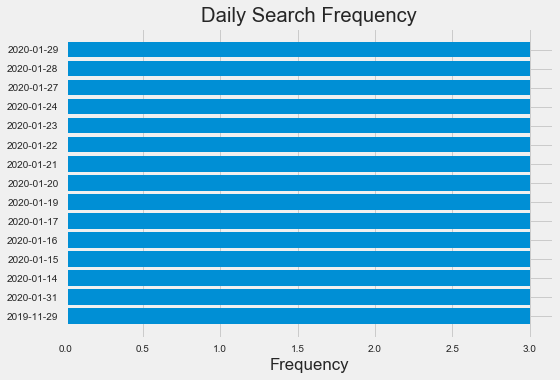

In [107]:
# 画横柱状图

plt.style.use("fivethirtyeight")


search_date = list(daily_fre_20['search_date'])
search_date_count = list(daily_fre_20['search_date_count'])


# reverse to get horizon chart
# search_date.reverse()
# search_date_count.reverse()

# 横向的bar chart
plt.barh(search_date, search_date_count)

plt.title("Daily Search Frequency")
# plt.ylabel("Programming Languages")
plt.xlabel("Frequency")

plt.tight_layout()

plt.show()


In [ ]:
# finished code
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

daily_fre['search_date'] = pd.to_datetime(daily_fre['search_date']) # replacing string datetime with datetime 

search_date = list(daily_fre['search_date'])
search_date_count = list(daily_fre['search_date_count'])

plt.plot_date(search_date, search_date_count, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Daily Search Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

In [27]:
# 搜索量最高的是 ‘2020-01-31’ 2020-01-31, 这一天大家都搜索了什么，回到src_df中找
filt = plot_data['search_date'] == '2020-01-31'
filt

63      False
746     False
736     False
164     False
1466    False
588     False
2454    False
17      False
1575    False
1317    False
46      False
1817    False
165     False
1423    False
1249    False
1100    False
915     False
713     False
32      False
358     False
102     False
2456    False
765     False
1613    False
476     False
2217    False
2255    False
1947    False
947     False
103     False
        ...  
15      False
1125    False
161     False
2557    False
2215    False
336     False
845     False
2244    False
291     False
2117    False
1665    False
1098    False
1263    False
630     False
213     False
925     False
1722    False
1070    False
1946    False
1773    False
2515    False
587     False
774     False
91      False
1644    False
62      False
527     False
370     False
1071    False
1935    False
Name: search_date, Length: 652, dtype: bool

In [28]:
# plot_data_200131 = plot_data.loc[filt]
# plot_data_200131
plot_data

,userid,search_date,userid_count
63,mohammad+inv@covacap.com,2019-11-29,5
746,nikhil+syn2@covacap.com,2019-11-29,3
736,parag@covacap.com,2019-11-29,1
164,sanjay-syn@covacap.com,2019-11-29,8
1466,wenbin-syn@covacap.com,2019-11-29,13
588,rahil-syn@covacap.com,2019-12-01,3
2454,analytics2@covacap.com,2019-12-02,29
17,brianky.lee@blackrock.com,2019-12-02,3
1575,ed.tsui@db.com,2019-12-02,4
1317,george.li@db.com,2019-12-02,9


In [52]:
plot_data_200131 = plot_data.loc[filt]
# dir(plot_data_200131)
# help(plot_data_200131.sort_values)
plot_data_200131.sort_values(by = "userid_count", inplace=True)
plot_data_200131

/Users/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,userid,search_date,userid_count
11,matthew.song@sgx.com,2020-01-31,1
604,sahida+invadmin@covacap.com,2020-01-31,1
444,jason+viewonly@covacap.com,2020-01-31,2
1358,rahil@covacap.com,2020-01-31,2
1114,tj@covacap.com,2020-01-31,3
2290,wenbin+da@covacap.com,2020-01-31,3
2469,analytics2@covacap.com,2020-01-31,104


In [53]:
type(plot_data_200131)

pandas.core.frame.DataFrame

In [48]:
# mylst = [2,3,1,4,6,3]
# # dir(mylst)
# # help(mylst.sort)
# new_mylst = mylst.sort(reverse=True)
# # new_mylst = sorted(mylst, reverse=True)
# new_mylst

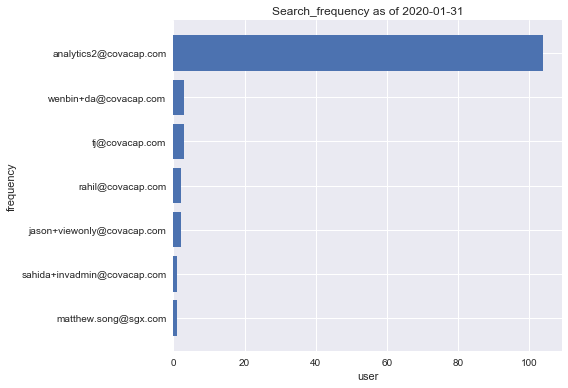

In [55]:
# 画图

# plt.style.use('seaborn')

userid = list(plot_data_200131['userid'])
userid_count = list(plot_data_200131['userid_count'])

# 横向的bar chart
plt.barh(userid, userid_count)

plt.title('Search_frequency as of 2020-01-31')
plt.xlabel('user')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()


In [61]:
plot_data.tail(1)

,userid,search_date,userid_count
1935,wenbin+da@covacap.com,2020-02-21,5


In [134]:
# 写一个method来为每一天的情况画图
# 画图
# plot_data
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

def plot_xy(x_axis, y_axis, fig_name):
    """
        input:
            x_axis: the list of x axis values
            y_axis: the list of y axis values
            fig_name: the name of the plot
        output:
            None
            The function will plot in the console
    """
    plt.barh(x_axis, y_axis)
    plt.barh(x_axis, y_axis)
    plt.title(f'Search_frequency as of {fig_name}')
    plt.ylabel('user')
    plt.xlabel('frequency')
    plt.tight_layout()
    plt.show()
    
    
def get_data(
    grp_data, 
    x_name,
    y_name,
    sortby_name="userid_count"
):
    grp_data = grp_data.sort_values(by = sortby_name, inplace=False)
    x_axis = list(grp_data[x_name])
    y_axis = list(grp_data[y_name])
    return x_axis,y_axis

def plot_grp_data(
    grp_data, 
    filt_name,
    x_name ="userid", 
    y_name = "userid_count",
    sortby_name="userid_count" 
):
    x,y = get_data(
        grp_data=grp_data,
        x_name = x_name,
        y_name = y_name,
        sortby_name=sortby_name
    )
    plot_xy(x_axis=x, y_axis=y, fig_name = filt_name)
    
    
def data_generator(plot_data, grpby_name = "search_date"):
    grp = plot_data.groupby(grpby_name)
    for grp_name, grp_data in grp:
        yield grp_name, grp_data, grp_data["userid_count"].values.sum()

In [135]:
data_list = list(data_generator(plot_data))
help(data_list.sort)
data_list.sort(key = lambda x:x[2], reverse=True)
# data_list

Help on built-in function sort:

sort(*, key=None, reverse=False) method of builtins.list instance
    Stable sort *IN PLACE*.



In [136]:
grp_name, grp_data, userid_count_sum = data_list[0]

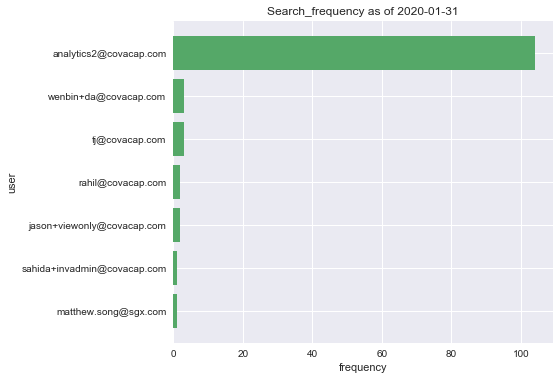

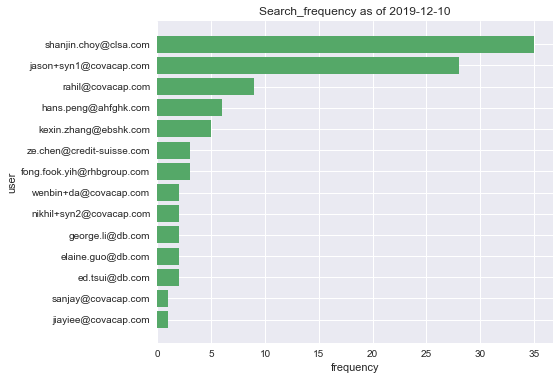

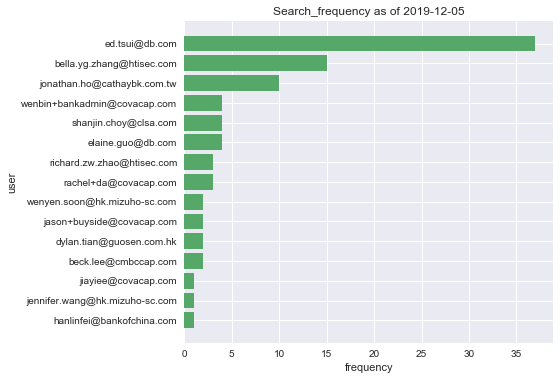

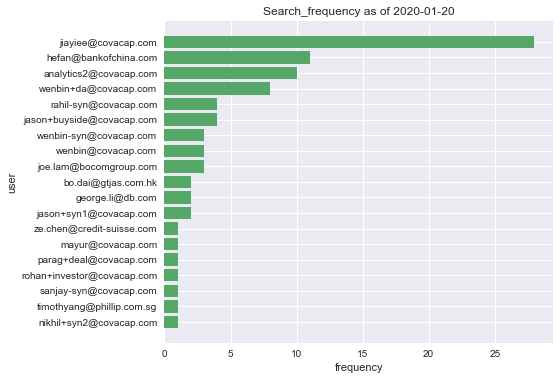

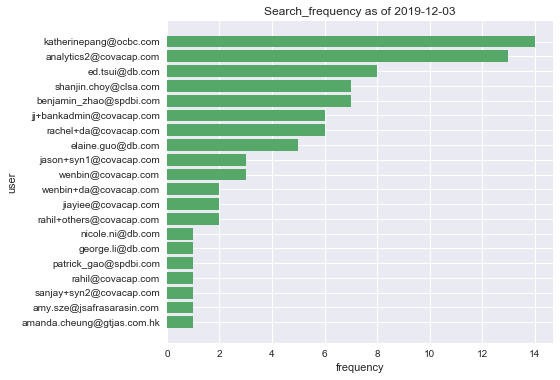

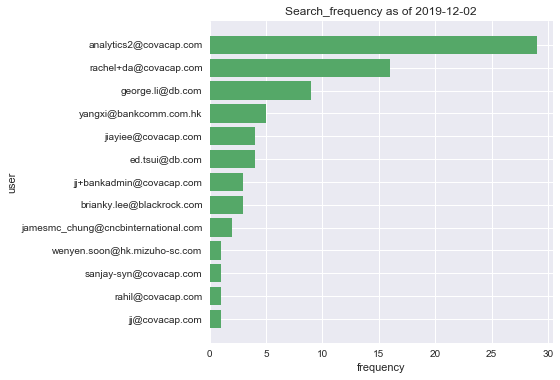

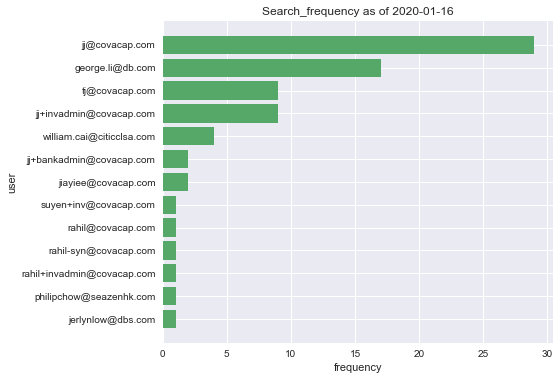

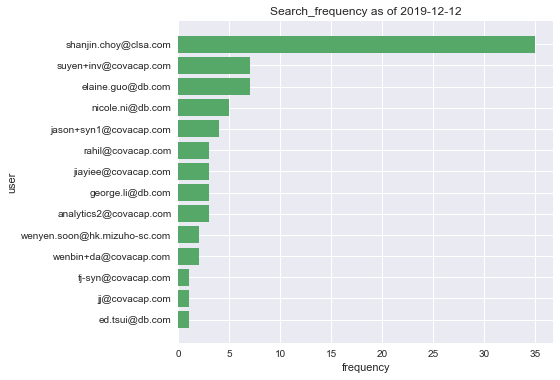

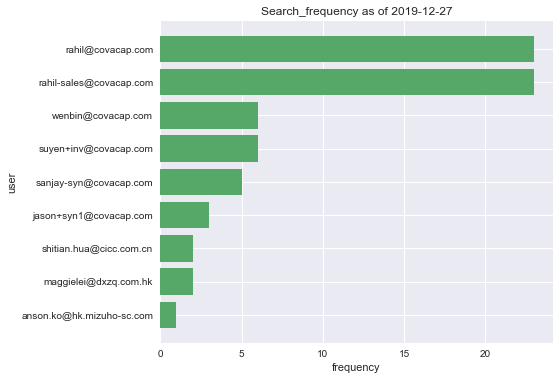

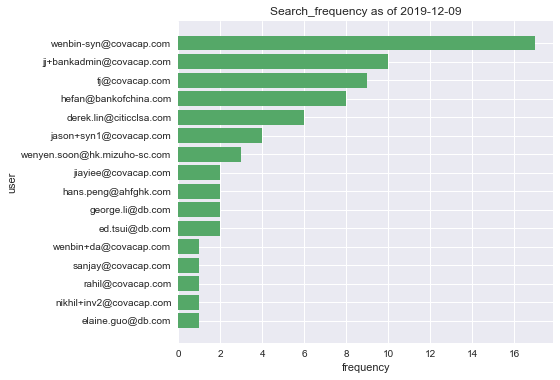

In [137]:
for i in range(10):
    grp_name, grp_data, userid_count_sum = data_list[i]
    plot_grp_data(
        grp_data = grp_data,
        filt_name = grp_name
    )

In [81]:
help(plot_xy)

Help on function plot_xy in module __main__:

plot_xy(x_axis, y_axis, fig_name)
    input:
        x_axis: the list of x axis values
        y_axis: the list of y axis values
        fig_name: the name of the plot
    output:
        None
        The function will plot in the console



In [78]:
date_lst = []
grp_data_lst = []
grp = plot_data.groupby('search_date')
for grp_name, grp_data in grp:
    date_lst.append(grp_name)
    grp_data_lst.append(grp_data)

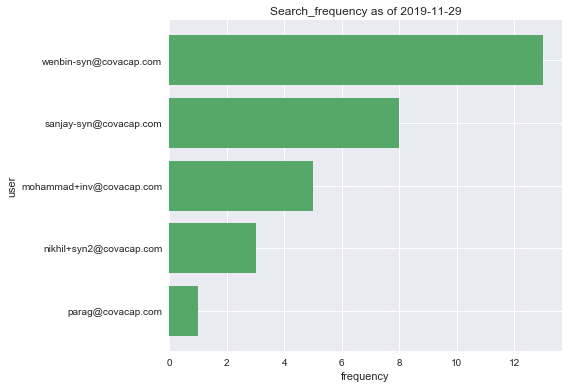

In [79]:
plot_grp_data(
    plot_data = plot_data,
    filt_name = date_lst[0]
)

<class 'pandas.core.frame.DataFrame'>
x_axis : 
 ['mohammad+inv@covacap.com', 'nikhil+syn2@covacap.com', 'parag@covacap.com', 'sanjay-syn@covacap.com', 'wenbin-syn@covacap.com']
y_axis : 
 [5, 3, 1, 8, 13]


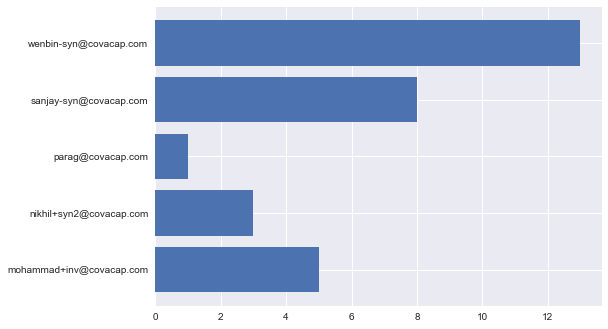

hshs


In [35]:
plot_draw(plot_data=plot_data, grpby_name='search_date', filt_name = date_lst[0])

In [36]:
plt.show()

In [37]:
plot_data.head()

,userid,search_date,userid_count
63,mohammad+inv@covacap.com,2019-11-29,5
746,nikhil+syn2@covacap.com,2019-11-29,3
736,parag@covacap.com,2019-11-29,1
164,sanjay-syn@covacap.com,2019-11-29,8
1466,wenbin-syn@covacap.com,2019-11-29,13


In [ ]:
# 将同一个人但不同的邮件名称的人合并,先不合并了，哈哈哈哈
same_pl = data_cov_2019['userid'].replace(['wenbin+bankadmin@covacap.com', 
                                 'wenbin-syn@covacap.com', 
                                 'wenbin+da@covacap.com'],
                                 ['wenbin@covacap.com', 
                                  'wenbin@covacap.com',
                                   'wenbin@covacap.com'])

In [ ]:
# declare our own string class 

class String: 
	
	# magic method to initiate object 
	def __init__(self, string): 
		self.string = string 
		
	# print our string object 
	def __repr__(self): 
		return '沙鹰: {}'.format(self.string) 
    
	def __repr__(self): 
		return '沙鹰: {}'.format(self.string) 

# Driver Code 
if __name__ == '__main__': 
	
	# object creation 
	string1 = String('Hello') 

	# print object location 
	print(string1) 

In [ ]:
mylst = list(("a", "b", "c"))
mylst

In [ ]:
help(mylst)

In [ ]:
dir(mylst)

In [ ]:
import json
class People:
    """
        __init__(self, name, sex=None, age=None):
        
        name: person's name
        sex:person's sex
        age:person's age
    """
    def __init__(self, name, sex=None, age=None):
        self.sex = sex
        self.age = age
        self.name = name
        
    def __repr__(self):
#         return f"I am {self.name} and I am a {self.age} {self.sex}"
        return json.dumps({
            "NAME":self.name,
            "SEX":self.sex,
            "AGE":self.age
        })
    
    def do_something(self, food = None):
        """
            This funciton describes this person likes to eat what
        """
        print(f"{self.name} likes to eat {food} and his/her profile is \n{self}")

In [ ]:
zhouyy = People(
    "Olivia",
    sex = "Female",
    age = "3"
)


songlu = People(
    "stanley",
    sex = "Male",
    age = "30"
)

zhouyy.do_something("orange")

In [ ]:
help(zhouyy.do_something)

In [ ]:
a = np.array(["1", 2, 3])
a

In [ ]:
a[1]

In [ ]:
a = dict({"NAME": "Olivia", "SEX": "Female", "AGE": "3"})
a

In [ ]:
help(a)

In [ ]:
b = dict({"NAME": "Olivia", "SEX": "Female", "AGE": "3"})
print(b)

In [ ]:
class MyDict(dict):
    def __init__(self, dic):
        super().__init__(dic)
    
    def __repr__(self):
        return "\n".join([f"{k}-{v}" for k, v in self.items()])

a = MyDict({"NAME": "Olivia", "SEX": "Female", "AGE": "3"})
print(a)

In [ ]:
print(mydict)

In [ ]:
help(mydict)

In [ ]:
",".join(["a", "b", "c"])

In [ ]:
class Animal():
    def __init__(self, name=None, color=None):
        self.name = name
        self.color = color
        
    def __repr__(self):
        return f"{self.name} --- {self.color}"
    
    def eat(self, food=None): 
        return f"{self.name} likes eatting {food}."

In [ ]:
dog = Animal(name="dog", color="black")
dog

In [ ]:
cat = Animal(name="cat", color="white")
cat

In [ ]:
class Dog(Animal):
    def __init__(self, name=None, color=None, size="Big"):
        super().__init__(name=name, color=color)
        self.size=size
        
    def sports(self, sports='running'):
        return f"{self.name} likes {sports}"
    
    
class Cat(Animal):
    def __init__(self, name=None, color=None, size="Small"):
        super().__init__(name=name, color=color)
        self.size=size
        
    def sleep(self):
        

In [ ]:
dog1 = Dog(name="dog1", color="black1")
dog1.sports(sports='running')

In [ ]:
dog1.size

In [26]:
dog1.eat(food = 'shit')

NameError: name 'dog1' is not defined

In [ ]:
cat1 = Cat(name="cat1", color="white1")
cat1.size